In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import tf_keras as keras
import tensorflow_hub as hub
#import tensorflow as tf

#tf.config.list_physical_devices()
#tf.config.list_physical_devices("GPU")

In [32]:
# 훈련데이터, 타겟, 분류 데이터 불러오기
train_data = np.load('train.npy')
target_data = np.load('target.npy')
categories = np.load('category.npy').tolist()

In [33]:
print(train_data.shape, target_data.shape)

(7008988, 28, 28, 3) (7008988,)


In [34]:
# 훈련세트, 테스트 세트 분리 
train_input, test_input, train_target, test_target = train_test_split(
    train_data, target_data, test_size=10000
)

In [35]:
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(6998988, 28, 28, 3) (10000, 28, 28, 3)
(6998988,) (10000,)


In [36]:
# 훈련세트, 검증세트 분리
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.1
)

In [38]:
#!pip install tf_keras==2.16.0
#!pip install tensorflow-metal
#!pip install tensorflow-macos

In [ ]:
# 사전학습된 EfficientB0 베이스 모델 가져오기
base_model = hub.KerasLayer("https://www.kaggle.com/models/tensorflow/efficientnet/TensorFlow2/b0-feature-vector/1")

# 층 구성하기
inputs = keras.Input(shape=(224,224,3))
x = keras.layers.Rescaling(1.0 / 255.0)(inputs)
x = base_model(x)
x = keras.layers.Dense(128, activation='relu')(x)
outputs = keras.layers.Dense(len(categories), activation='softmax')(x)
model = keras.Model(inputs, outputs)

adam = keras.optimizers.legacy.Adam(learning_rate=0.0001)
model.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=8, restore_best_weights=True)

hist = model.fit(train_input, train_target, epochs=50, validation_data=(val_input, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50
32/32 [==============================] - ETA: 0s - loss: 3.9201 - accuracy: 0.0340

KeyboardInterrupt: 

NameError: name 'hist' is not defined

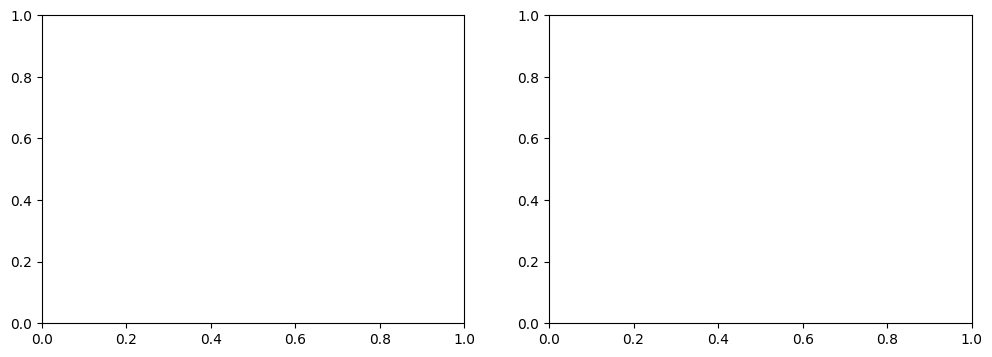

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(12,4))
axs[0].plot(range(1, 21), hist.history['loss'], label='loss')
axs[0].plot(range(1, 21), hist.history['val_loss'], label='val_loss')
axs[0].set_xticks(range(1, 21))
axs[0].set_xlabel('epoch')
axs[0].set_ylabel('loss')
axs[0].legend()
axs[1].plot(range(1, 21), hist.history['accuracy'], label='accuracy')
axs[1].plot(range(1, 21), hist.history['val_accuracy'], label='val_accuracy')
axs[1].set_xlabel('epoch')
axs[1].set_ylabel('accuracy')
axs[1].legend()
plt.show()

In [ ]:
# 모델 평가 하기
model.evaluate(test_input, test_target)

313/313 [==============================] - 6s 18ms/step - loss: 3.9544 - accuracy: 0.0171


[3.954357147216797, 0.017100000753998756]